AMAZON ASSIGNMENT  
OBJECTIVE : To convert the text data reviews into vector and visualise it in 2-dimension plane.

In [1]:
#importing import libraries
import re
import pandas as pd
import numpy as np
import sqlite3
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
#making connection with the sqlit file
con=sqlite3.connect('final2.sqlite')

In [3]:
DataSet=pd.read_sql_query(""" SELECT * FROM Reviews """,con)

In [4]:
DataSet.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,this witty little book makes my son laugh at l...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",i grew up reading these sendak books and watch...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,this is a fun way for children to learn their ...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,this is a great little book to read it has a n...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,this is a book of poetry about the months of t...


In [22]:
#taking a sample of 10000 data points
new_data=DataSet.iloc[:2500,:]

In [23]:
score=new_data['Score']

In [7]:
# FOR BAG OF WORDS
Count=CountVectorizer()

In [8]:
Vec_data=Count.fit_transform(new_data['CleanedText'])

In [9]:
Vec_data.shape

(5000, 16006)

In [10]:
#converting the sparce matrix to a regular matrix of arrays
Vec_data=Vec_data.toarray()

In [ ]:
#Standardising the Vec_data

In [11]:
Standard_Data=StandardScaler().fit_transform(Vec_data)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
tsne1 = tsne(n_jobs=-1,n_iter=1000,n_components=2,perplexity=30,random_state=0)

In [ ]:
Tsne_data=tsne1.fit_transform(Standard_Data)

In [84]:
Tsne_Data=np.vstack((Tsne_data.T,score)).T

In [85]:
Tsne_Data.shape

(10000, 3)

In [86]:
Final_df=pd.DataFrame(data=Tsne_Data,columns=('Feature1','Feature2','Review'))

In [14]:
# Ploting our points

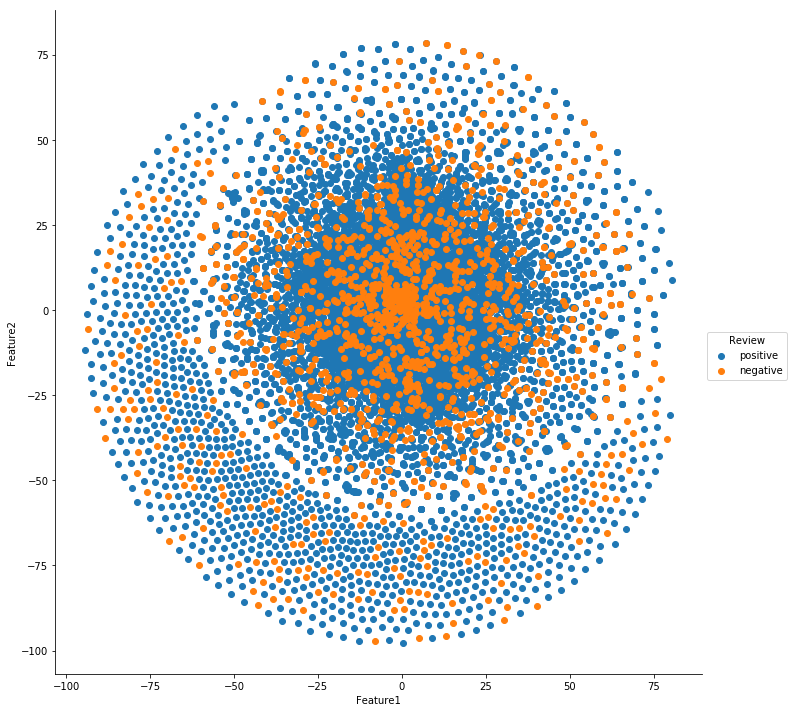

In [89]:
sns.FacetGrid(Final_df,hue='Review',size=10).map(plt.scatter,'Feature1','Feature2').add_legend()
plt.show() 

OBSERVATIONS:


In [ ]:
# The 2-D t-SNE plot is somewhat like a circle

In [ ]:
# Most of the negative reviews are centered with most of the positive reviews surrounding it.

In [ ]:
# The graph is beautiful as upto some extent it helps to classify or visualize the polarity of reviews.

N-GRAM BoW

In [ ]:
#Here we use uni-gram and bi-gram to do our job with 2500 data points.

In [44]:
new_data['Score'].value_counts()

positive    2075
negative     425
Name: Score, dtype: int64

In [52]:
count_vector=CountVectorizer(ngram_range=(1,2))

In [53]:
N_gram_vector=count_vector.fit_transform(new_data['CleanedText'])

In [47]:
N_gram_vector=N_gram_vector.toarray()

In [48]:
N_gram_vector_std=StandardScaler().fit_transform(N_gram_vector)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [49]:
N_gram_vector_std.shape 

(2500, 90461)

In [50]:
tsne_n=tsne(n_jobs=-1,n_components=2,n_iter=1000,random_state=0,perplexity=30)

In [51]:
N_gram_vector_tsne=tsne_n.fit_transform(N_gram_vector_std)

In [52]:
N_gram_vector_final=np.vstack((N_gram_vector_tsne.T,score)).T

In [53]:
N_gram_vector_final.shape

(2500, 3)

In [54]:
N_gram_vector_final=pd.DataFrame(data=N_gram_vector_final,columns=('Feature 1','Feature 2','Review'))

In [55]:
N_gram_vector_final.head(5)

,Feature 1,Feature 2,Review
0,0.153181,-0.318277,positive
1,1.45043,-0.255653,positive
2,-0.659322,1.31234,positive
3,2.0878,-0.390859,positive
4,0.0976926,0.117899,positive


In [56]:
N_gram_vector_final['Review'].value_counts()

positive    2075
negative     425
Name: Review, dtype: int64

In [ ]:
#Now , we visualize the t-SNE plot.

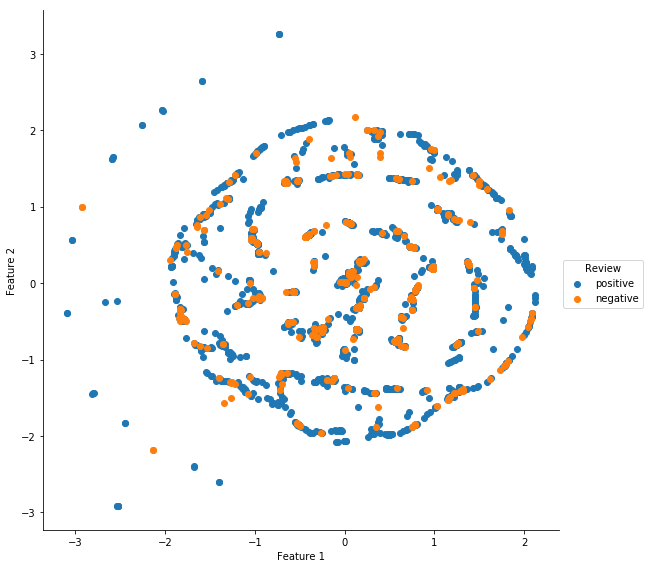

In [58]:
sns.FacetGrid(N_gram_vector_final,hue='Review',size=8).map(plt.scatter,'Feature 1','Feature 2').add_legend()
plt.show()

OBSERVATIONS:

In [ ]:
# The plot is not very much clear . Here the positive and negative polarity overlaps very much

In [ ]:
# We can't make out any conclusion based on this plot

TF-IDF

In [ ]:
# Now we use Term Frequency Inverse Document Frequency to do our job

In [24]:
tf_vector=TfidfVectorizer(ngram_range=(1,2))

In [25]:
Tf_idf=tf_vector.fit_transform(new_data['CleanedText'])

In [26]:
Tf_idf.shape

(2500, 112162)

In [34]:
Tf_array=Tf_idf.toarray()

In [35]:
Tfidf_standard=StandardScaler().fit_transform(Tf_array)

In [33]:
tsne_i=tsne(n_jobs=-1,n_components=2,n_iter=1000,random_state=0,perplexity=30)

In [34]:
Tfidf_tsne=tsne_i.fit_transform(Tfidf_standard)

In [35]:
Tfidf_full=np.vstack((Tfidf_tsne.T,score)).T

In [37]:
Tfidf_full.shape

(2500, 3)

In [38]:
Tfidf_final=pd.DataFrame(data=Tfidf_full,columns=('Feature 1','Feature 2','Review'))

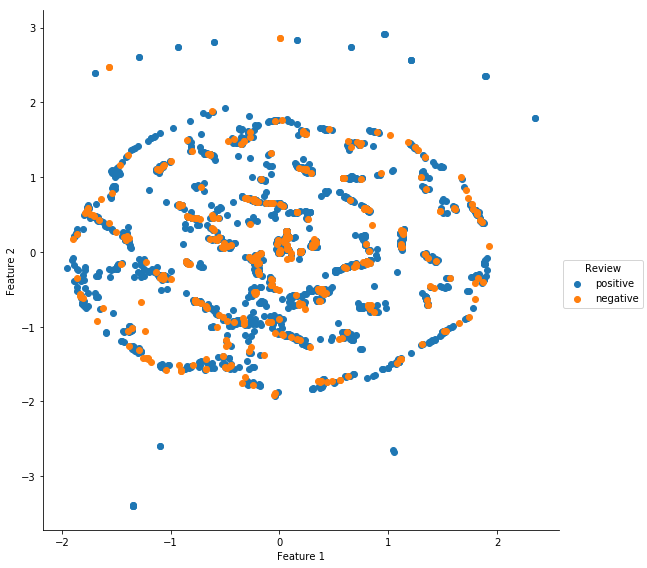

In [41]:
sns.FacetGrid(Tfidf_final,hue='Review',size=8).map(plt.scatter,'Feature 1','Feature 2').add_legend()
plt.show()


OBSERVATION:

In [ ]:
# The plot is not much clear . 

In [ ]:
# Positive and Negative polarity reviews are spread with no regular pattern.

In [ ]:
# Both polarity overlaps .

In [ ]:
# Can't make out any conclusion based on this graph

WORD-2-VECTOR

In [ ]:
# Here we make our own model 

In [7]:
# Here we train our model by amazon fine food review data set
# Here we are converting every word into a vector of 50 dimensions

In [11]:
i=0
list_of_sent=[]
for sent in DataSet['CleanedText']:
    list_of_sent.append(sent.split())

In [12]:
w2v_model=Word2Vec(list_of_sent,min_count=3,size=50, workers=4)

In [13]:
words=list(w2v_model.wv.vocab)

In [14]:
len(words)

44349

In [16]:
w2v_model.wv.most_similar('tasty')

[('tastey', 0.9181497693061829),
 ('yummy', 0.8605075478553772),
 ('satisfying', 0.8461860418319702),
 ('filling', 0.8421791791915894),
 ('delicious', 0.828730046749115),
 ('flavorful', 0.8015463948249817),
 ('delectable', 0.7612864971160889),
 ('addicting', 0.7603613138198853),
 ('versatile', 0.7485297322273254),
 ('tasteful', 0.746576189994812)]

AVEARGE WORD_2_VECTOR

In [ ]:
# Now we use Average word2vec model to visualize and classify our polarity by making the text data into vectors

In [26]:
# First we calculate the average w2v for each text review in the dataseta and store them in the list.

In [64]:
avg_w2v=[]
for sent in new_data['CleanedText']:
    sen_vec=np.zeros(50)
    count=0
    for i in sent.split():
        if i in words:
            vec=w2v_model.wv[i]
            sen_vec+=vec
            count+= 1
    if count!= 0:
        sen_vec /= count
    avg_w2v.append(sen_vec)

In [65]:
Avg_w2v_std=StandardScaler().fit_transform(avg_w2v)

In [68]:
TSne=tsne(n_jobs=-1,n_components=2,n_iter=1000,random_state=0,perplexity=30)

In [69]:
Avg_w2v_tsne=TSne.fit_transform(Avg_w2v_std)

In [70]:
Avg_w2v_tsne.shape

(5000, 2)

In [71]:
Avg_w2v_final=np.vstack((Avg_w2v_tsne.T,score)).T

In [72]:
Avg_w2v_final=pd.DataFrame(Avg_w2v_final,columns=('Feature 1','Feature 2','Reviews'))

In [73]:
Avg_w2v_final.head()

,Feature 1,Feature 2,Reviews
0,4.16183,7.47747,positive
1,3.88505,13.5321,positive
2,0.944661,8.32667,positive
3,-9.64618,-4.55868,positive
4,-4.28418,1.43154,positive


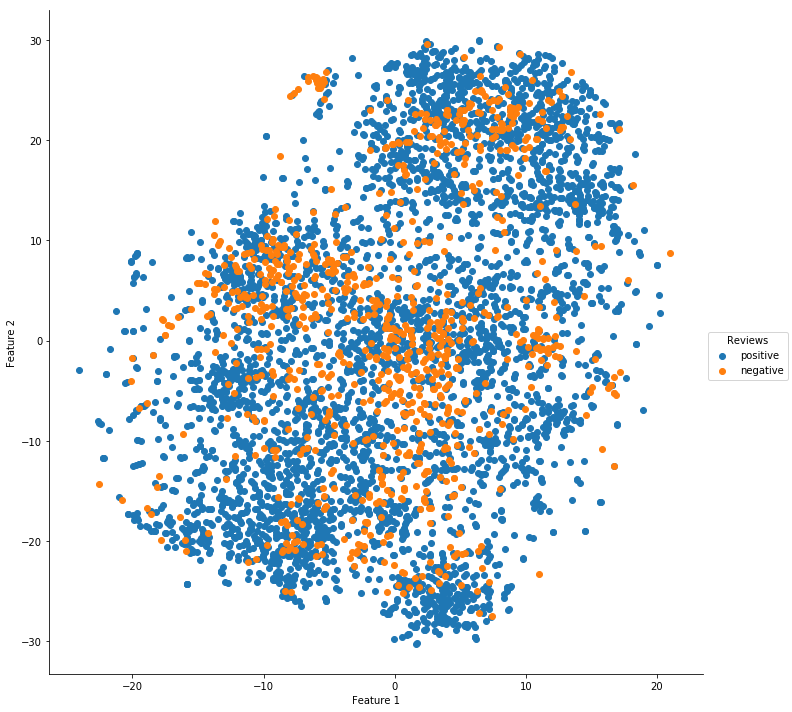

In [74]:
sns.FacetGrid(Avg_w2v_final,hue='Reviews',size=10).map(plt.scatter,'Feature 1','Feature 2').add_legend()
plt.show()



OBSERVATION:

In [ ]:
# The graph looks beautiful and more clear than the previous graphs with taking 5k data points

In [ ]:
# Here, more or less we can classify or visualize between the positive and negative reviews .
# There are areas in the graph were overlapping can be seen between the reviews.

TFIDF_W2VECTOR


In [ ]:
# Now we will use TF-IDF_W2V Model to visualize our data .
# Here we have calculated our TF-IDF_W2V vector for each sentence and stored it in a list called "tfidf_w2vec".

In [ ]:
tfidf_feat = tf_vector.get_feature_names()
tfidf_sent_vectors = []
row=0;
for sent in new_data['CleanedText']: 
    sent_vec = np.zeros(50)
    weight_sum =0; 
    #print(row)
    #print(sent)
    for word in sent.split(): 
        #print(word)
        if((word in words)&(word in tfidf_feat)):
            #print(word)
            vec = w2v_model.wv[word]
            #print(vec)
            tf_idf = Tf_idf[row , tfidf_feat.index(word)]
            #print(tf_idf)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
        #print(sent_vec)
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [34]:
tfidf_w2vec=StandardScaler().fit_transform(tfidf_sent_vectors)

In [35]:
tfidf_w=tsne(n_jobs=-1,n_components=2,n_iter=1000,random_state=0,perplexity=30)

In [36]:
tfidf_w2vec.shape

(2500, 50)

In [38]:
TFIDF_W2V=tfidf_w.fit_transform(tfidf_w2vec)

In [39]:
TFIDF_W2V.shape

(2500, 2)

In [40]:
TFIDF_W2VEC=np.vstack((TFIDF_W2V.T,score)).T

In [44]:
TFIDF_W2VEC.shape

(2500, 3)

In [45]:
TFIDF_W2V_DF=pd.DataFrame(data=TFIDF_W2VEC,columns=('Feature 1','Feature 2','Scores'))

In [46]:
TFIDF_W2V_DF.head()

,Feature 1,Feature 2,Scores
0,-11.1139,4.96894,positive
1,-3.91925,2.8376,positive
2,-11.1994,3.11779,positive
3,-10.932,-1.64985,positive
4,-10.7926,4.83921,positive


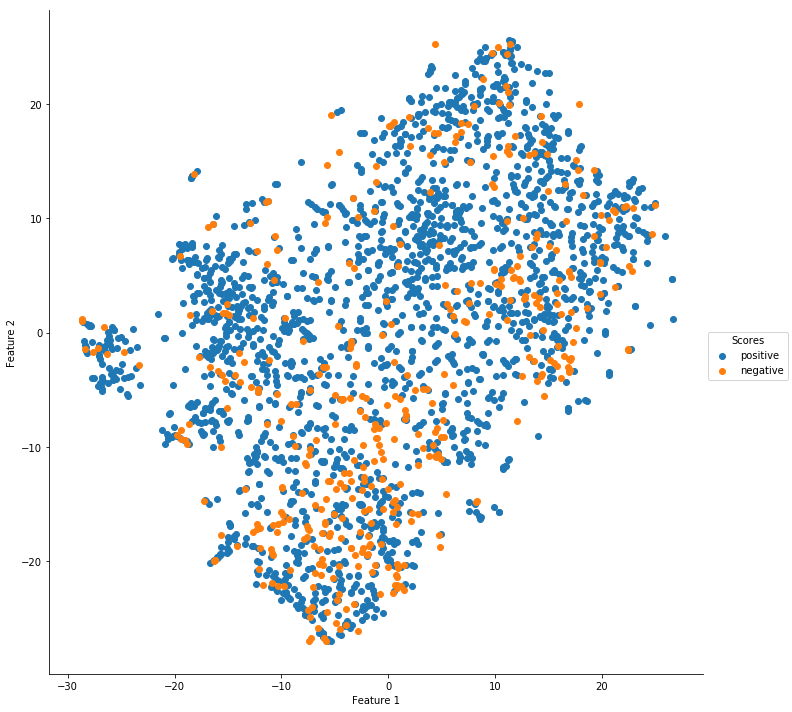

In [47]:
sns.FacetGrid(TFIDF_W2V_DF,hue='Scores',size=10).map(plt.scatter,'Feature 1','Feature 2').add_legend()
plt.show()

OBSERVATION

In [48]:
# Here for 2.5k reviews , we can almost differentiate between the polarities

In [49]:
# For visualisation purpose , its a preety good model as we can clearly see both the polarities without much overlapping.

                                            END

                                         Assignment.